In [1]:
import requests
import csv
import numpy as np
from datetime import datetime
import time

monedas = ['bitcoin', 'ethereum', 'binancecoin', 'cardano', 'dogecoin', 'polkadot', 'ripple', 'solana', 'tether', 'matic-network']
URL_BASE = "https://api.coingecko.com/api/v3/coins/"

# Convertir la fecha "2020/09/18" a un objeto datetime
fecha_especifica = datetime.strptime("2020/08/19", "%Y/%m/%d")

# Convertir el objeto datetime a una marca de tiempo Unix
fecha_para_20_8_20 = time.mktime(fecha_especifica.timetuple())

# Obtener marca de tiempo Unix actual
FECHA_ACTUAL = int(time.time())

def obtener_datos(moneda, desde_FECHA, hasta_FECHA):
    url = f"{URL_BASE}{moneda}/market_chart/range?vs_currency=usd&from={fecha_para_20_8_20}&to={FECHA_ACTUAL}"
    respuesta = requests.get(url)
    datos = respuesta.json()
    return datos

def calcular_volatilidad_30_dias(precios):
    # Calcular rendimientos diarios
    rendimientos = [((precios[i] - precios[i - 1]) / precios[i - 1]) for i in range(1, len(precios))]
    
    # Calcular la volatilidad (desviación estándar de los rendimientos)
    volatilidad = np.std(rendimientos) * np.sqrt(30)  # Asumiendo 30 días en un mes
    return volatilidad

def guardar_en_csv(moneda, datos):
    with open(f"{moneda}.csv", "w", newline='') as archivo:
        # Escribir los encabezados primero
        archivo.write("Fecha,Precio,Capitalizacion_de_Mercado,Volumen_24h,Volatilidad_a_30_dias\n")

        precios = [item[1] for item in datos['prices']]
        
        for i in range(len(datos['prices'])):
            fecha = datetime.utcfromtimestamp(datos['prices'][i][0] / 1000).strftime('%Y-%m-%d')
            precio = "{:.3f}".format(datos['prices'][i][1])
            
            # Comprobar si el índice i existe en 'market_caps' y 'total_volumes'
            market_cap = "{:.3f}".format(datos['market_caps'][i][1]) if i < len(datos['market_caps']) else 0
            volumen = "{:.3f}".format(datos['total_volumes'][i][1]) if i < len(datos['total_volumes']) else 0
            
            # Calcular la volatilidad de los últimos 30 días si hay suficientes datos disponibles
            if i >= 29:
                volatilidad = "{:.3f}".format(calcular_volatilidad_30_dias(precios[i-29:i+1]))
            else:
                volatilidad = float(0)
            
            fila = f"{fecha},{precio},{market_cap},{volumen},{volatilidad}"
            
            # Solo añade un salto de línea si no es el último elemento
            archivo.write(fila + ("\n" if i < len(datos['prices']) - 1 else ""))



def borrar_ultimas_filas_vacias_o_incompletas(csv_file_path):
    with open(csv_file_path, 'r', newline='') as file:
        lineas = file.readlines()
       
        # Eliminar la última fila
        lineas = lineas[:-1]

        # Quitar el salto de línea del final para evitar un salto extra al escribir el archivo
        lineas[-1] = lineas[-1].rstrip('\n')

    with open(csv_file_path, 'w', newline='') as file:
        file.writelines(lineas)


for moneda in monedas:
        datos = obtener_datos(moneda, fecha_para_20_8_20, FECHA_ACTUAL)
        guardar_en_csv(moneda, datos)
        borrar_ultimas_filas_vacias_o_incompletas(f"{moneda}.csv")


-----------------------------
binancecoin.csv
-----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Fecha                      1100 non-null   object 
 1   Precio                     1100 non-null   float64
 2   Capitalizacion_de_Mercado  1100 non-null   float64
 3   Volumen_24h                1100 non-null   float64
 4   Volatilidad_a_30_dias      1100 non-null   float64
dtypes: float64(4), object(1)
memory usage: 43.1+ KB
None
-----------------------------
             Fecha       Precio  Capitalizacion_de_Mercado   Volumen_24h  \
count         1100  1100.000000               1.100000e+03  1.100000e+03   
unique        1100          NaN                        NaN           NaN   
top     2020-08-20          NaN                        NaN           NaN   
freq             1          NaN   

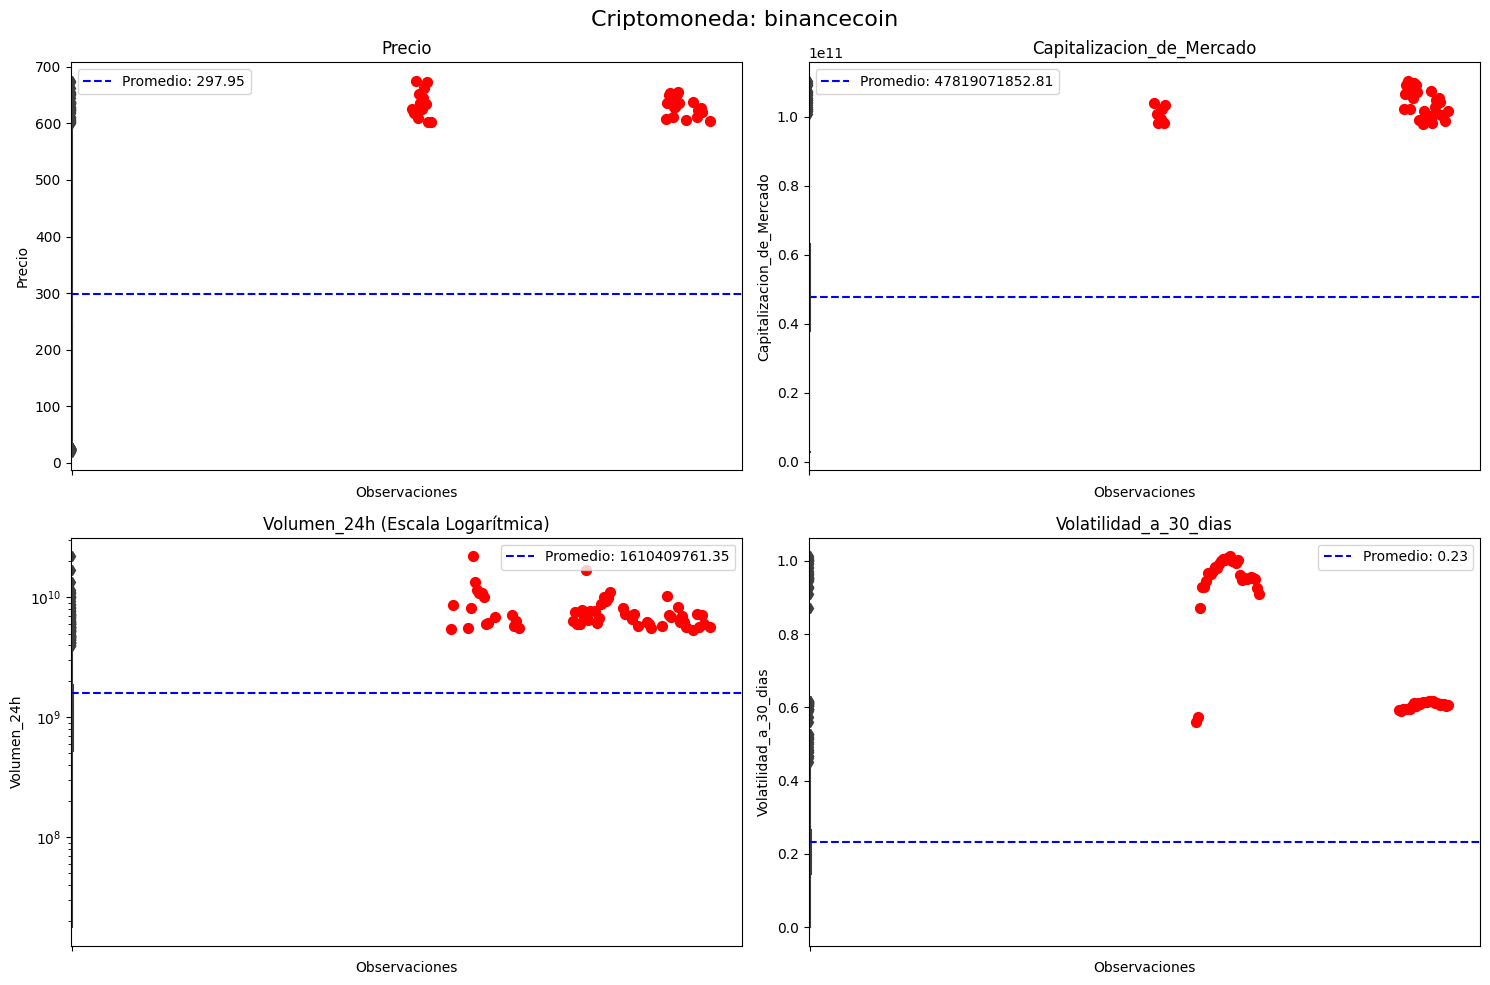

-----------------------------
bitcoin.csv
-----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Fecha                      1100 non-null   object 
 1   Precio                     1100 non-null   float64
 2   Capitalizacion_de_Mercado  1100 non-null   float64
 3   Volumen_24h                1100 non-null   float64
 4   Volatilidad_a_30_dias      1100 non-null   float64
dtypes: float64(4), object(1)
memory usage: 43.1+ KB
None
-----------------------------
             Fecha        Precio  Capitalizacion_de_Mercado   Volumen_24h  \
count         1100   1100.000000               1.100000e+03  1.100000e+03   
unique        1100           NaN                        NaN           NaN   
top     2020-08-20           NaN                        NaN           NaN   
freq             1           NaN  

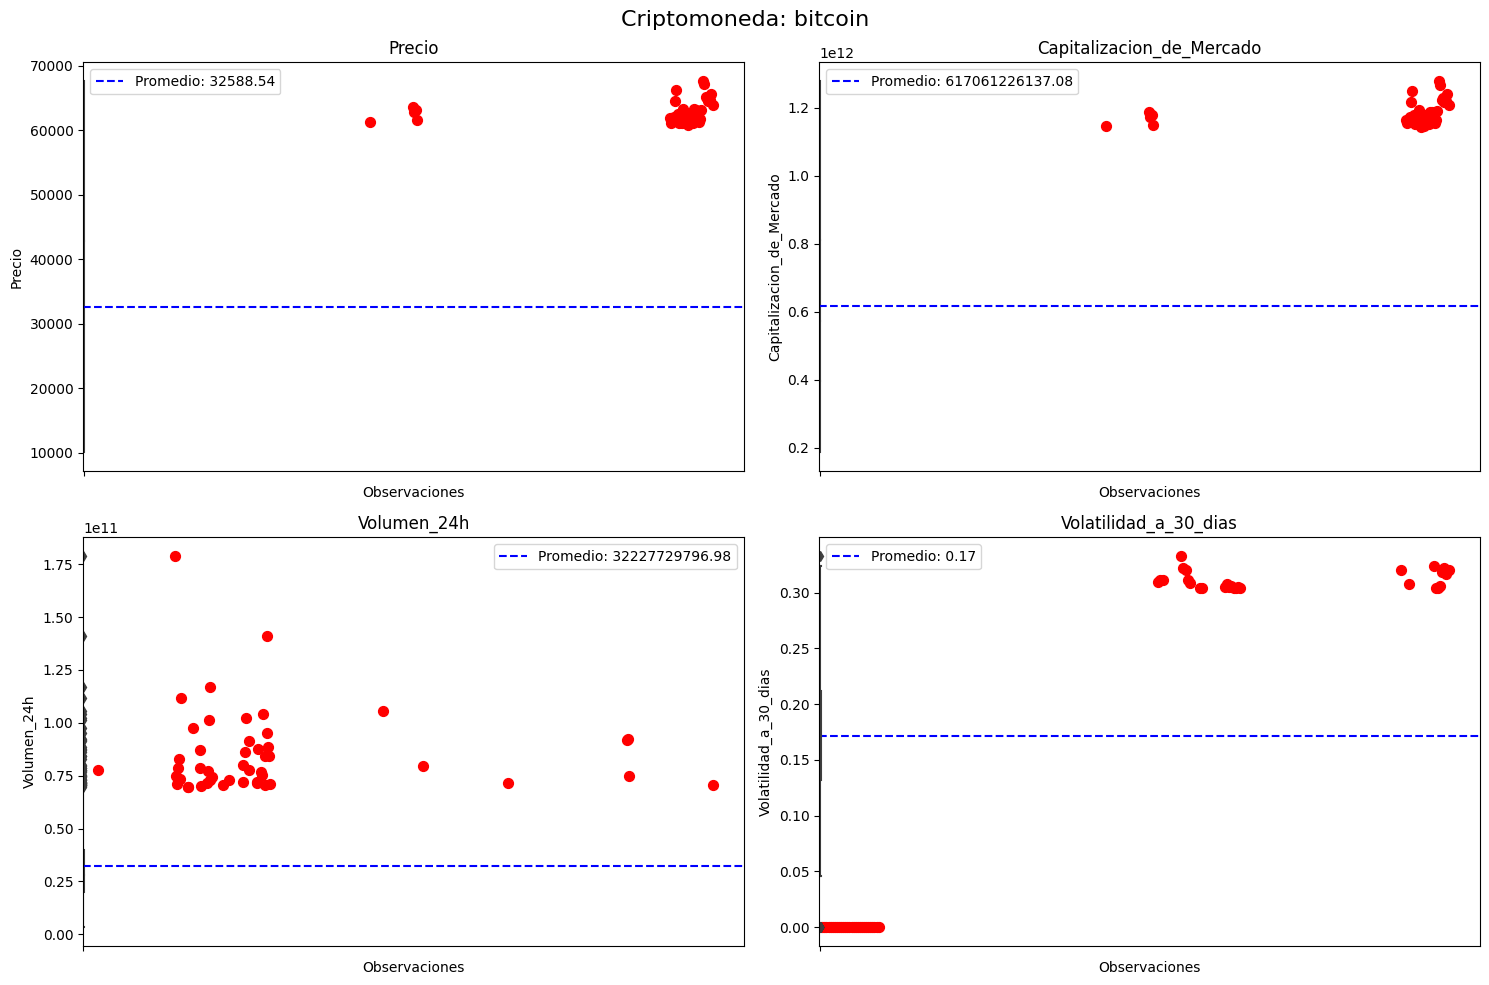

-----------------------------
cardano.csv
-----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Fecha                      1100 non-null   object 
 1   Precio                     1100 non-null   float64
 2   Capitalizacion_de_Mercado  1100 non-null   float64
 3   Volumen_24h                1100 non-null   float64
 4   Volatilidad_a_30_dias      1100 non-null   float64
dtypes: float64(4), object(1)
memory usage: 43.1+ KB
None
-----------------------------
             Fecha       Precio  Capitalizacion_de_Mercado   Volumen_24h  \
count         1100  1100.000000               1.100000e+03  1.100000e+03   
unique        1100          NaN                        NaN           NaN   
top     2020-08-20          NaN                        NaN           NaN   
freq             1          NaN       

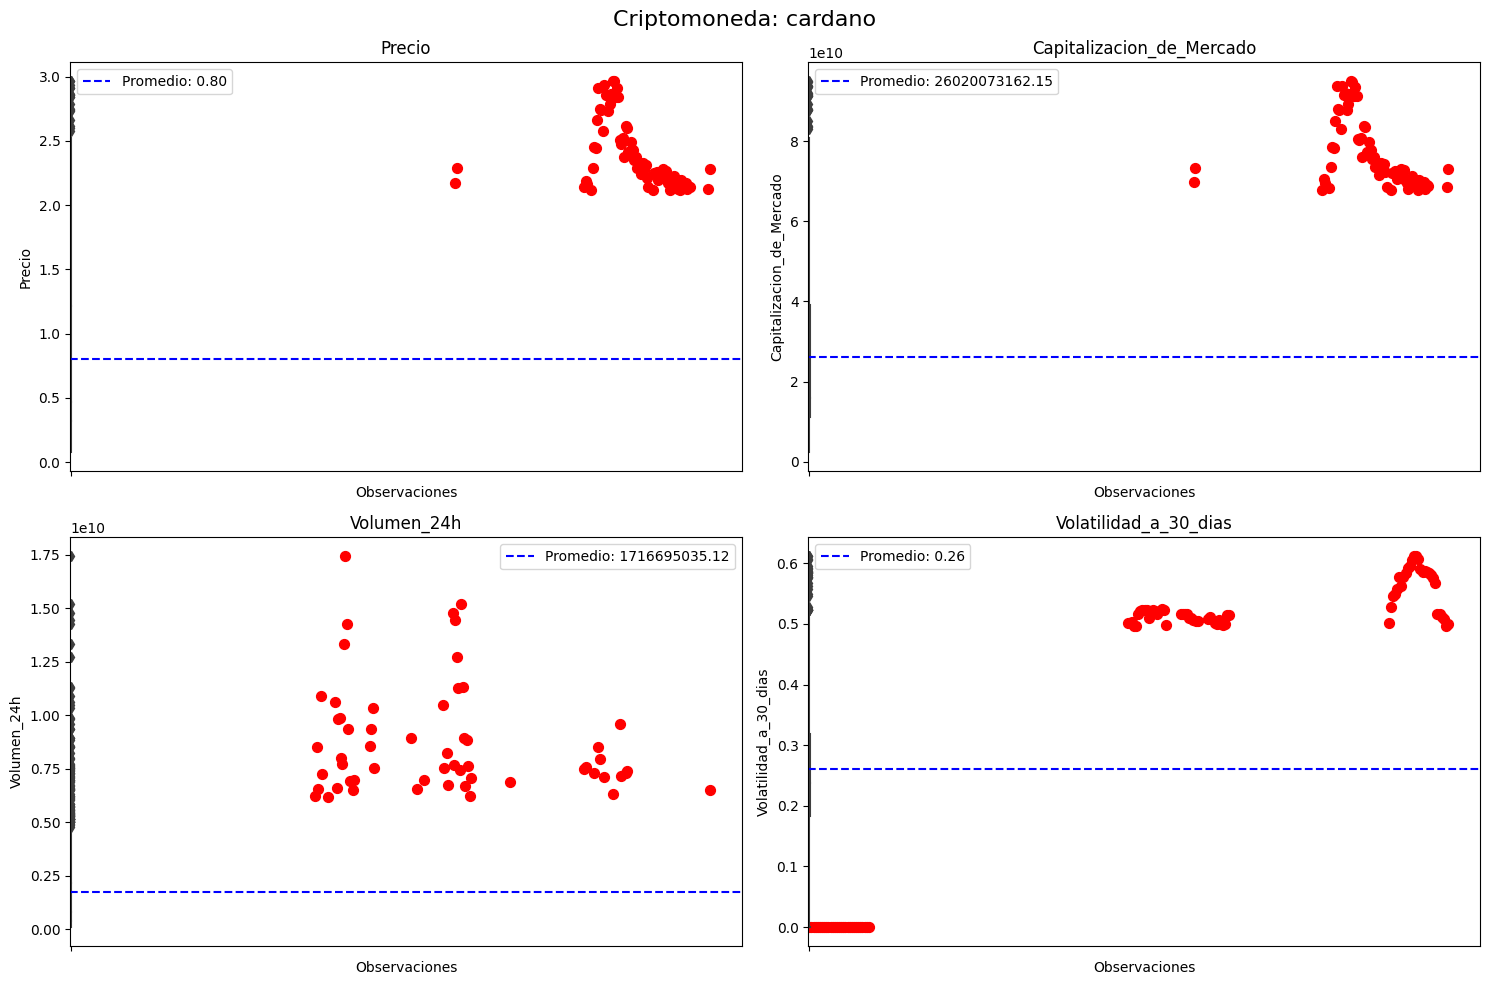

-----------------------------
dogecoin.csv
-----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Fecha                      1100 non-null   object 
 1   Precio                     1100 non-null   float64
 2   Capitalizacion_de_Mercado  1100 non-null   float64
 3   Volumen_24h                1100 non-null   float64
 4   Volatilidad_a_30_dias      1100 non-null   float64
dtypes: float64(4), object(1)
memory usage: 43.1+ KB
None
-----------------------------
             Fecha       Precio  Capitalizacion_de_Mercado   Volumen_24h  \
count         1100  1100.000000               1.100000e+03  1.100000e+03   
unique        1100          NaN                        NaN           NaN   
top     2020-08-20          NaN                        NaN           NaN   
freq             1          NaN      

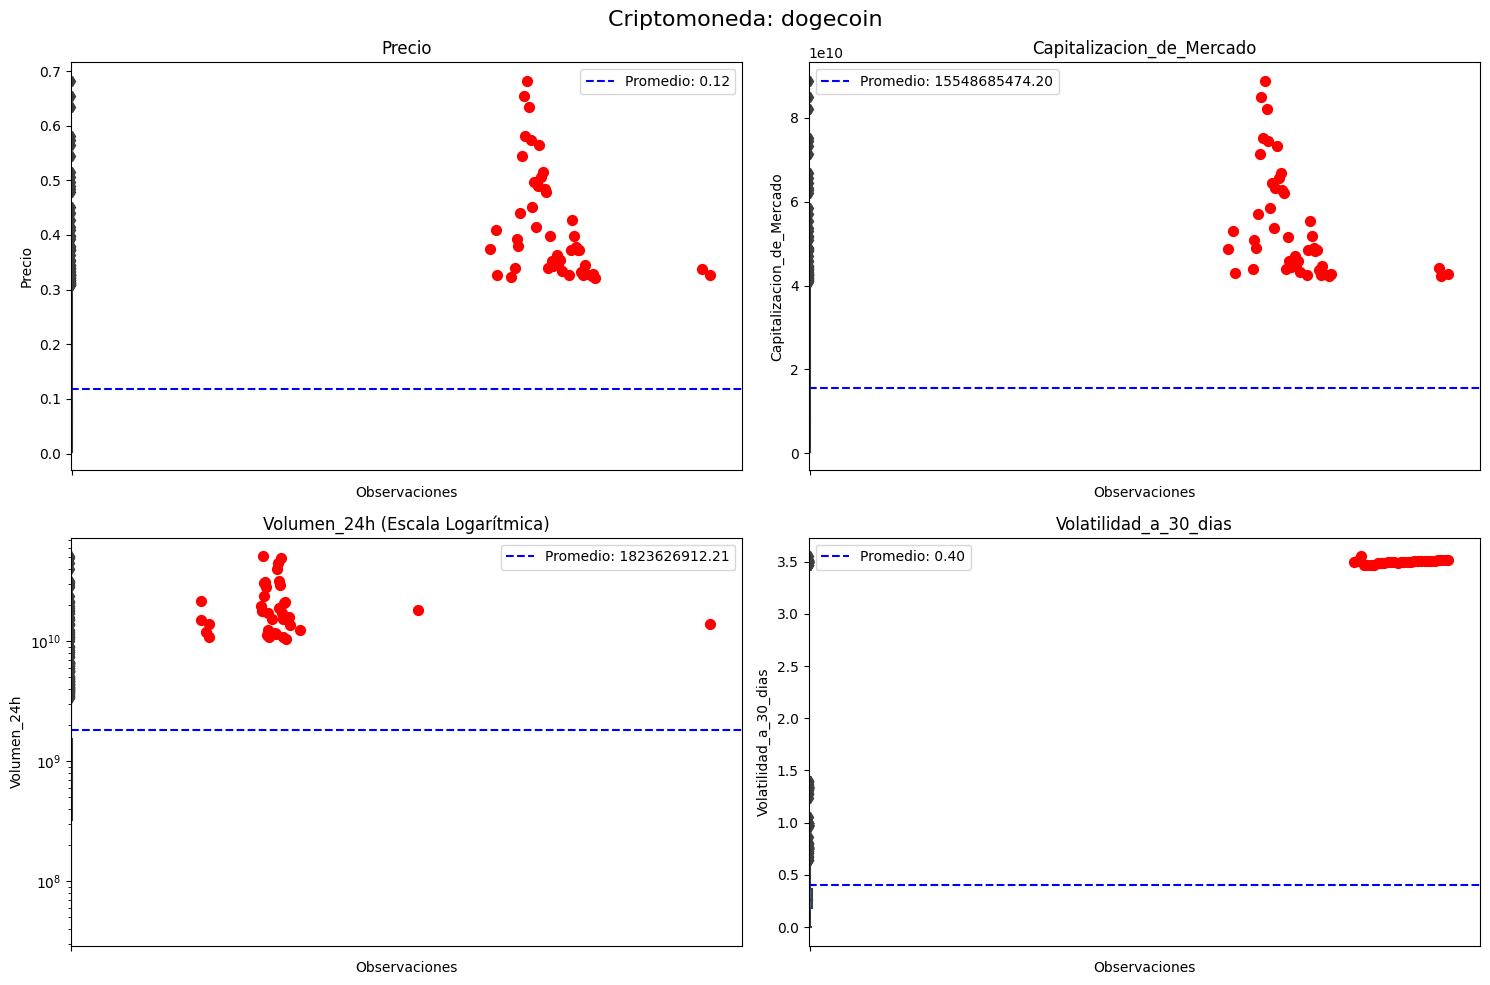

-----------------------------
ethereum.csv
-----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Fecha                      1100 non-null   object 
 1   Precio                     1100 non-null   float64
 2   Capitalizacion_de_Mercado  1100 non-null   float64
 3   Volumen_24h                1100 non-null   float64
 4   Volatilidad_a_30_dias      1100 non-null   float64
dtypes: float64(4), object(1)
memory usage: 43.1+ KB
None
-----------------------------
             Fecha       Precio  Capitalizacion_de_Mercado   Volumen_24h  \
count         1100  1100.000000               1.100000e+03  1.100000e+03   
unique        1100          NaN                        NaN           NaN   
top     2020-08-20          NaN                        NaN           NaN   
freq             1          NaN      

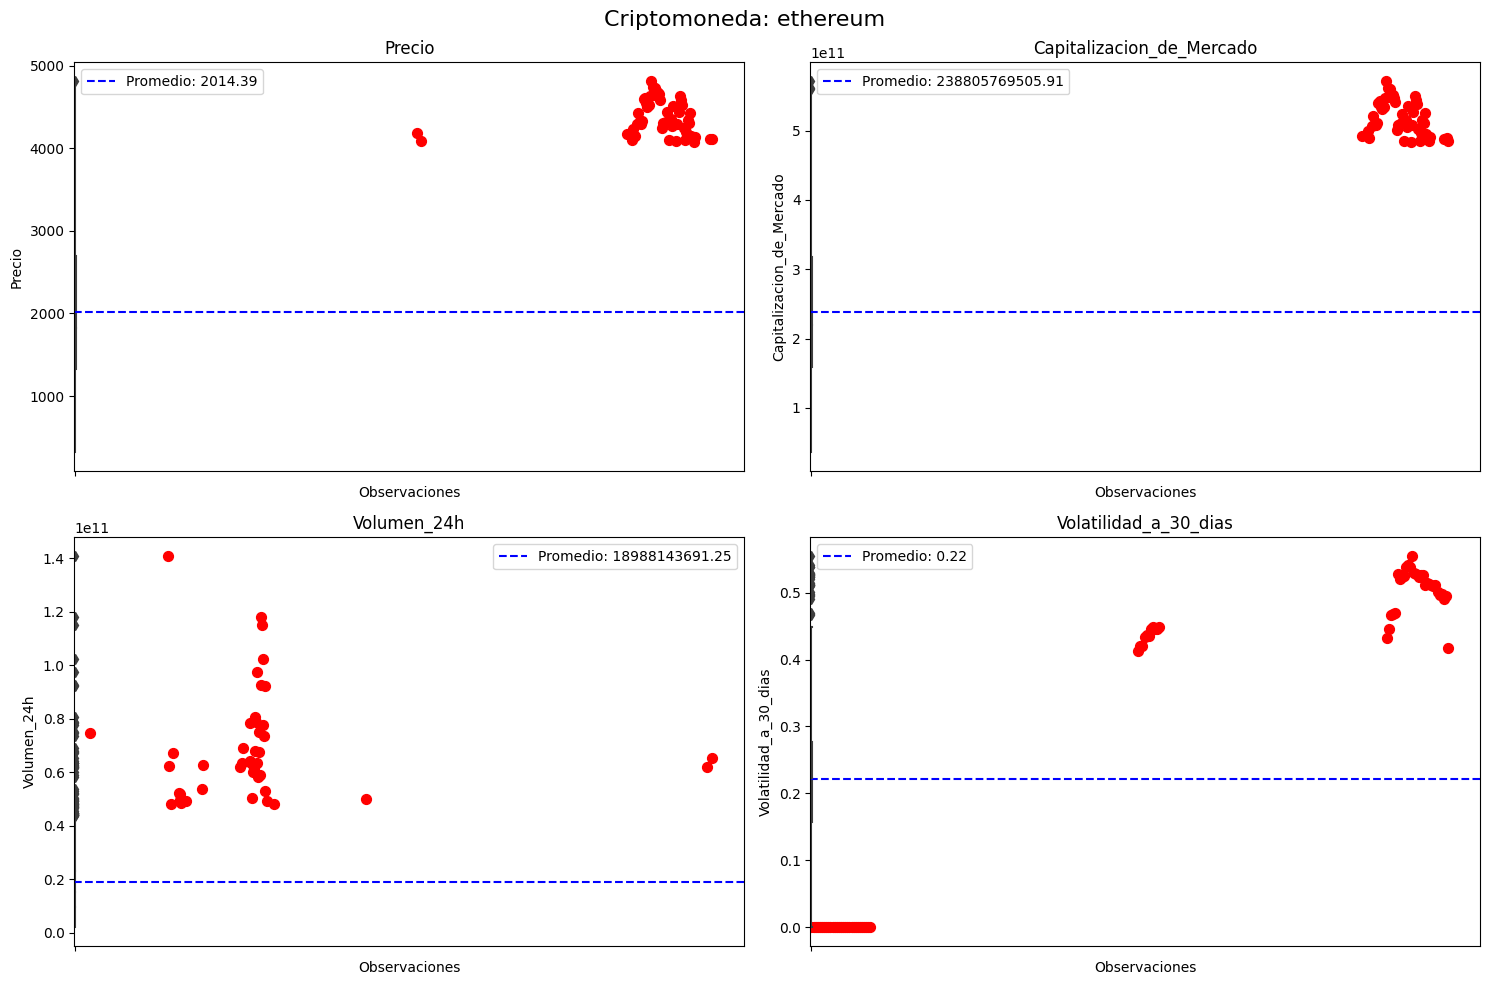

-----------------------------
matic-network.csv
-----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Fecha                      1100 non-null   object 
 1   Precio                     1100 non-null   float64
 2   Capitalizacion_de_Mercado  1100 non-null   float64
 3   Volumen_24h                1100 non-null   float64
 4   Volatilidad_a_30_dias      1100 non-null   float64
dtypes: float64(4), object(1)
memory usage: 43.1+ KB
None
-----------------------------
             Fecha       Precio  Capitalizacion_de_Mercado   Volumen_24h  \
count         1100  1100.000000               1.100000e+03  1.100000e+03   
unique        1100          NaN                        NaN           NaN   
top     2020-08-20          NaN                        NaN           NaN   
freq             1          NaN 

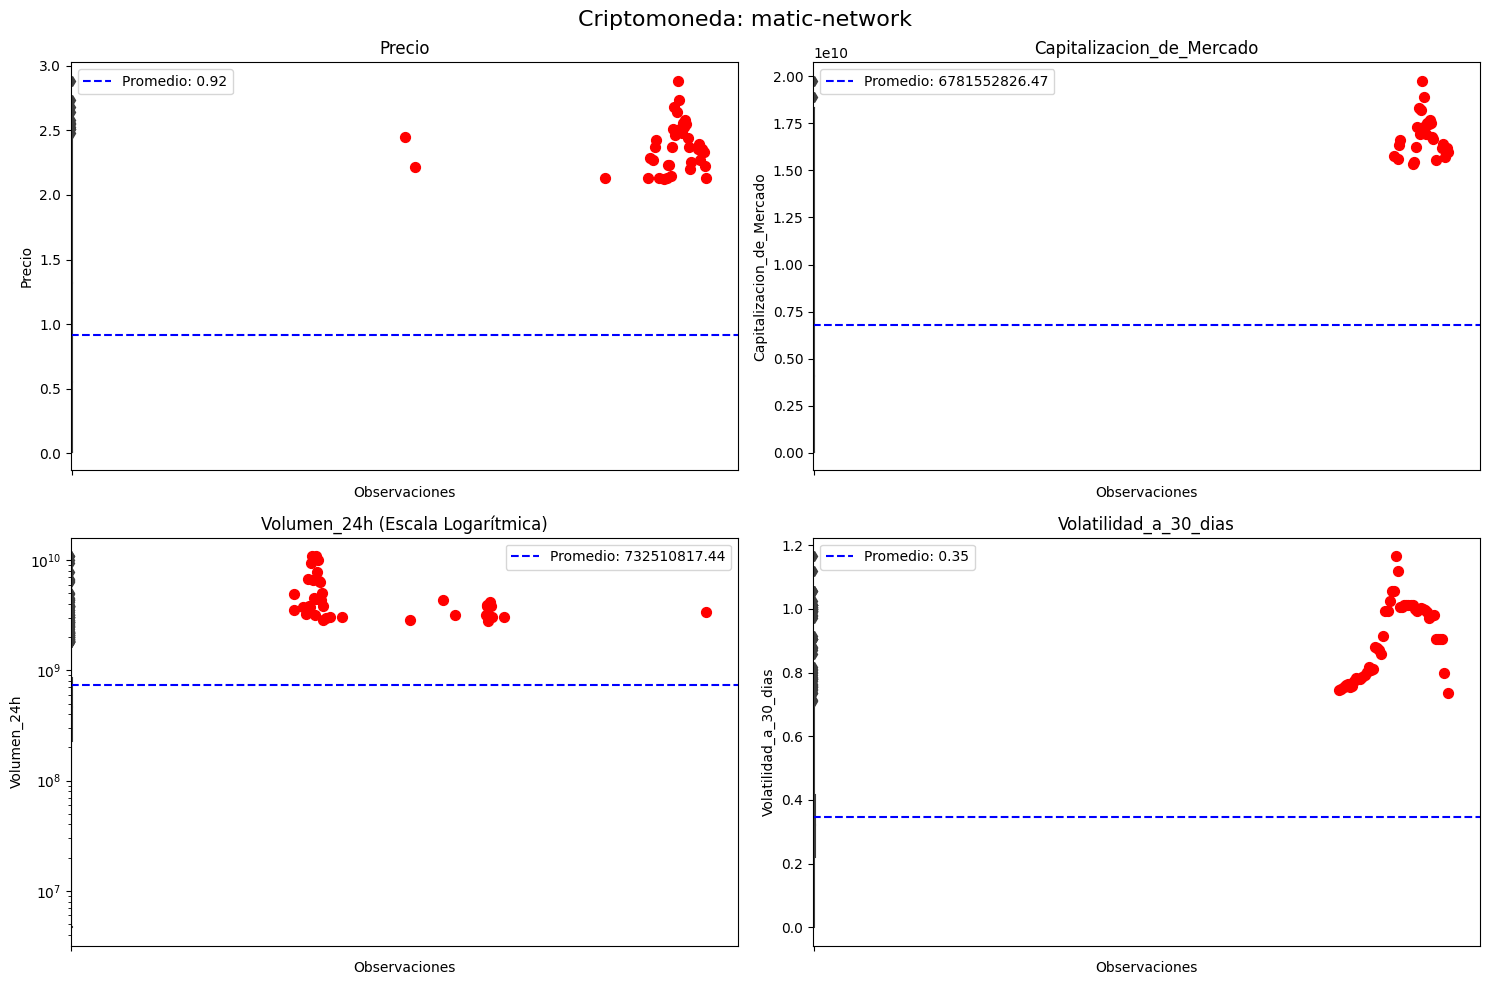

-----------------------------
polkadot.csv
-----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Fecha                      1100 non-null   object 
 1   Precio                     1100 non-null   float64
 2   Capitalizacion_de_Mercado  1100 non-null   float64
 3   Volumen_24h                1100 non-null   float64
 4   Volatilidad_a_30_dias      1100 non-null   float64
dtypes: float64(4), object(1)
memory usage: 43.1+ KB
None
-----------------------------
             Fecha       Precio  Capitalizacion_de_Mercado   Volumen_24h  \
count         1100  1100.000000               1.100000e+03  1.100000e+03   
unique        1100          NaN                        NaN           NaN   
top     2020-08-20          NaN                        NaN           NaN   
freq             1          NaN      

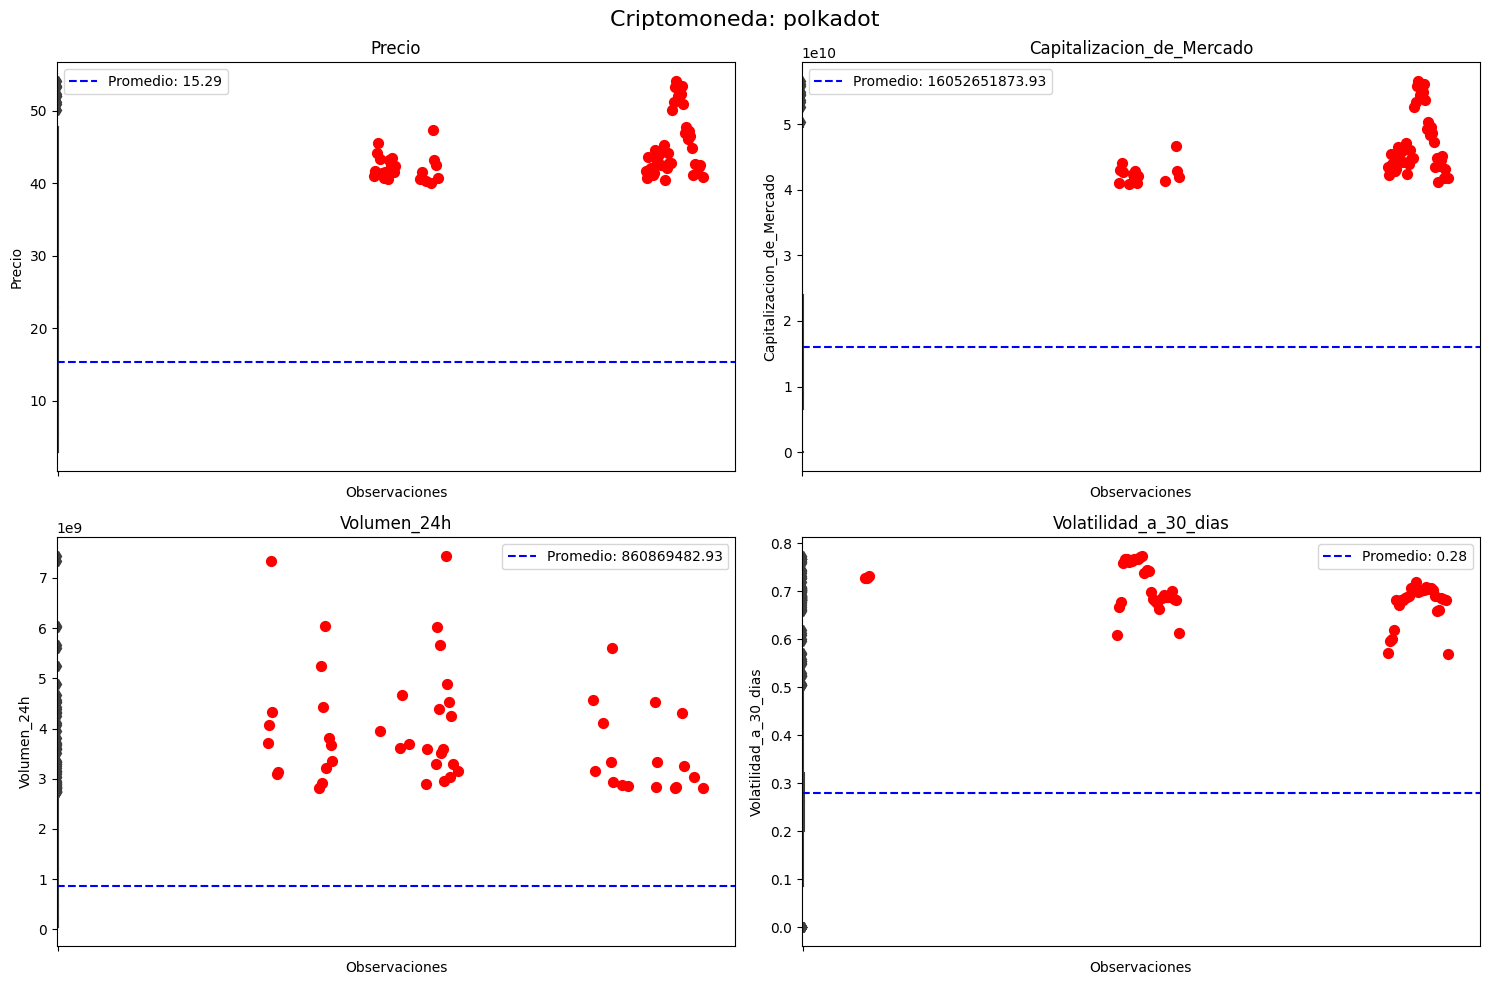

-----------------------------
ripple.csv
-----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Fecha                      1100 non-null   object 
 1   Precio                     1100 non-null   float64
 2   Capitalizacion_de_Mercado  1100 non-null   float64
 3   Volumen_24h                1100 non-null   float64
 4   Volatilidad_a_30_dias      1100 non-null   float64
dtypes: float64(4), object(1)
memory usage: 43.1+ KB
None
-----------------------------
             Fecha       Precio  Capitalizacion_de_Mercado   Volumen_24h  \
count         1100  1100.000000               1.100000e+03  1.100000e+03   
unique        1100          NaN                        NaN           NaN   
top     2020-08-20          NaN                        NaN           NaN   
freq             1          NaN        

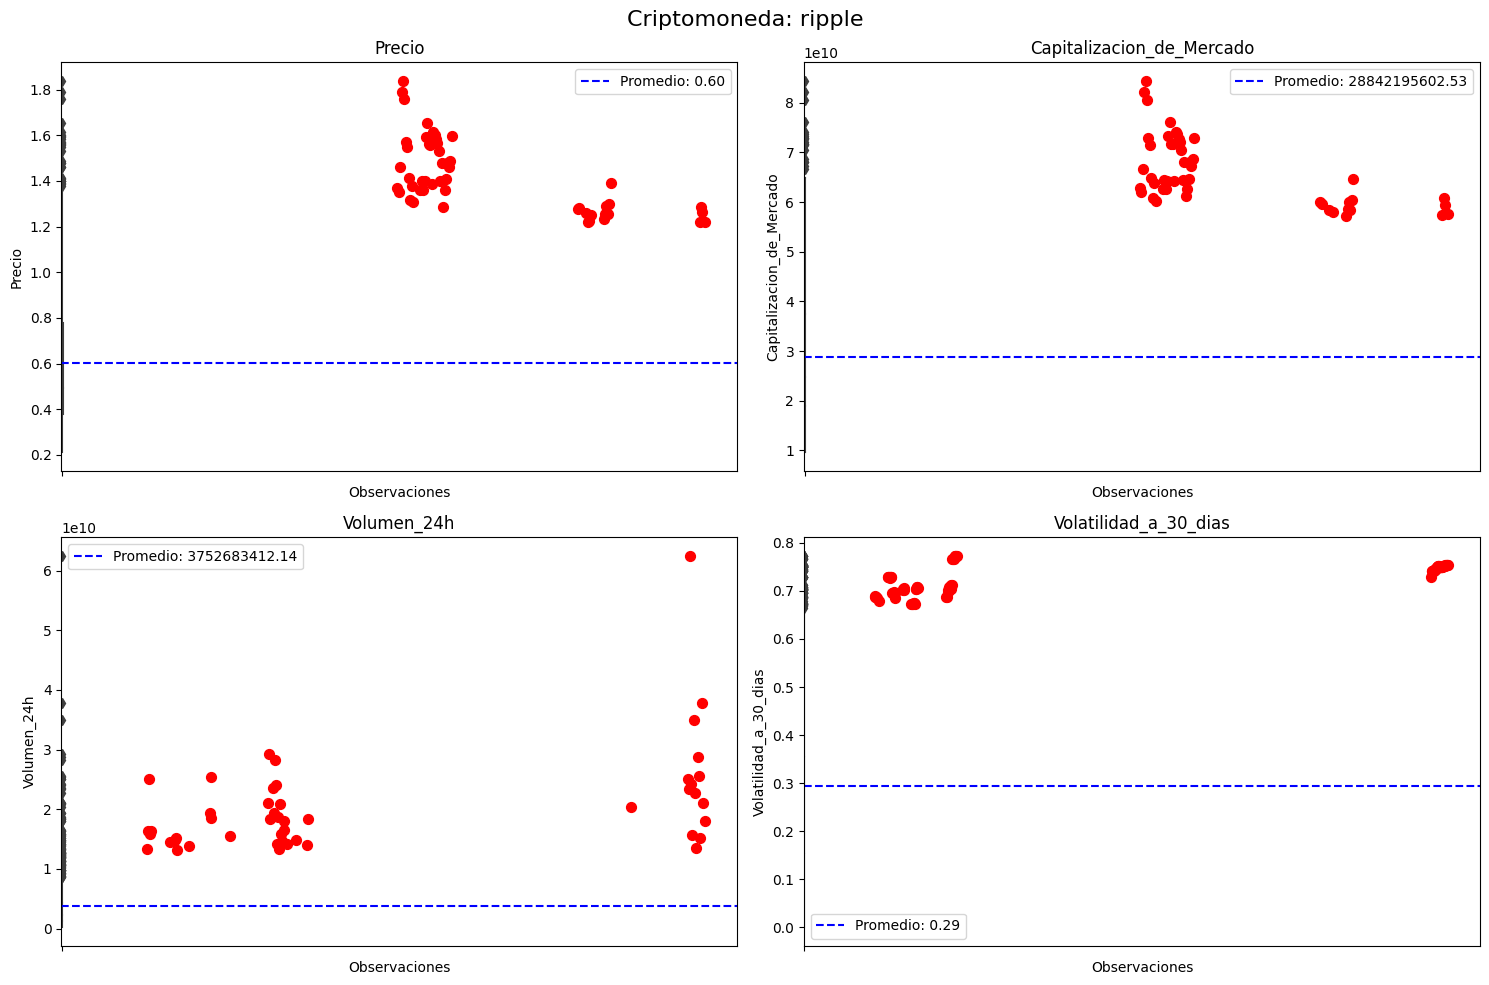

-----------------------------
solana.csv
-----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Fecha                      1100 non-null   object 
 1   Precio                     1100 non-null   float64
 2   Capitalizacion_de_Mercado  1100 non-null   float64
 3   Volumen_24h                1100 non-null   float64
 4   Volatilidad_a_30_dias      1100 non-null   float64
dtypes: float64(4), object(1)
memory usage: 43.1+ KB
None
-----------------------------
             Fecha       Precio  Capitalizacion_de_Mercado   Volumen_24h  \
count         1100  1100.000000               1.100000e+03  1.100000e+03   
unique        1100          NaN                        NaN           NaN   
top     2020-08-20          NaN                        NaN           NaN   
freq             1          NaN        

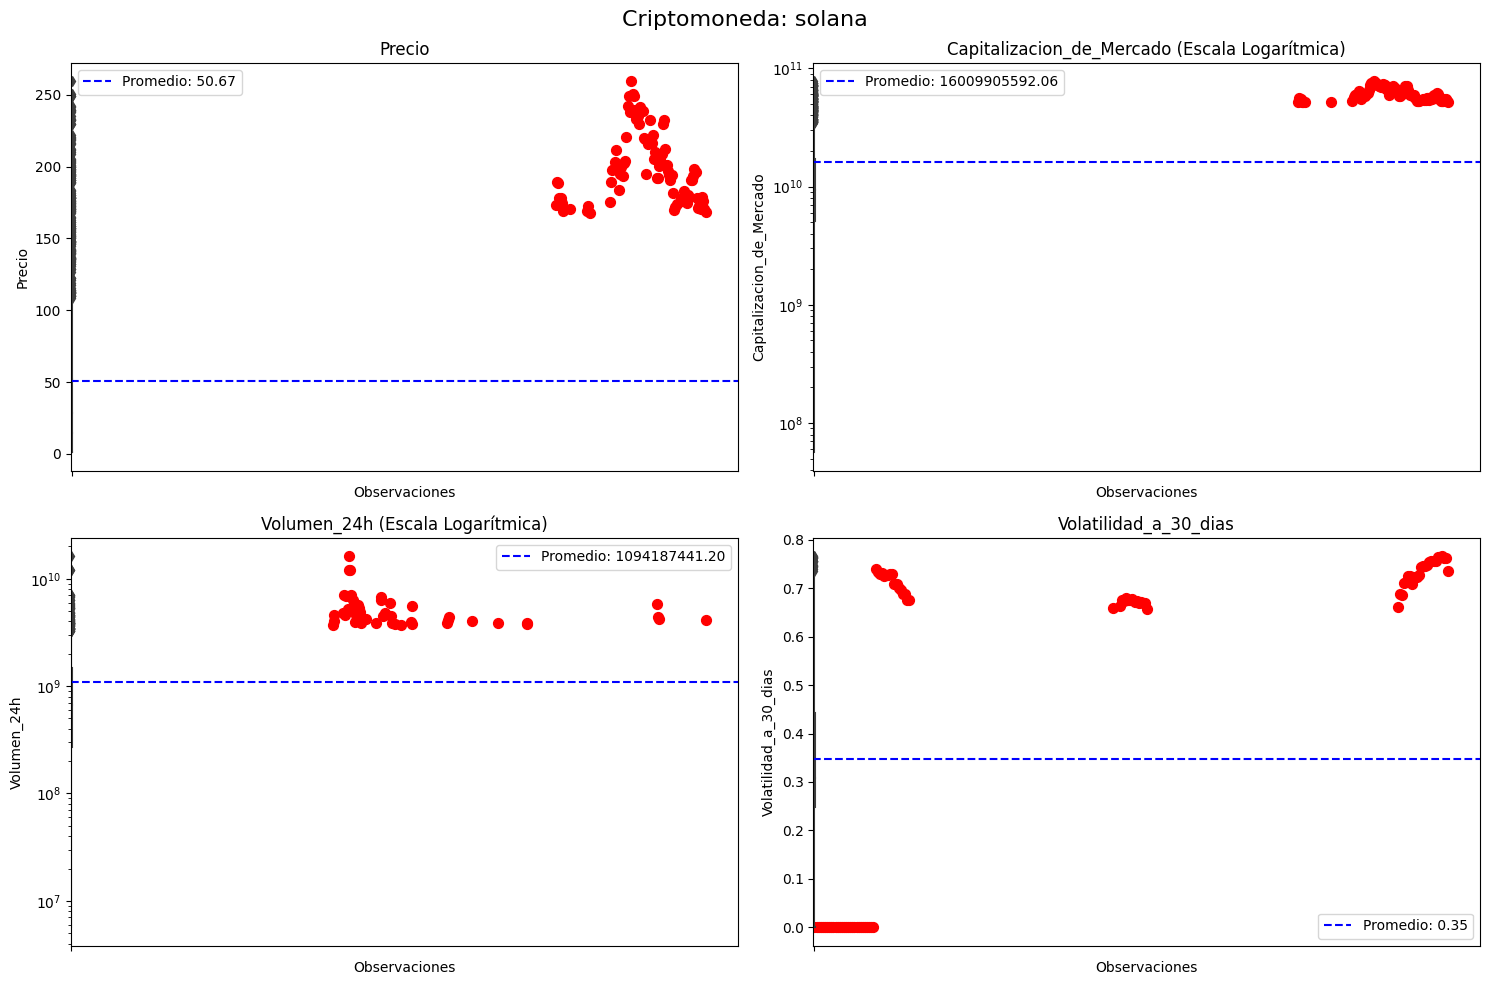

-----------------------------
tether.csv
-----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Fecha                      1100 non-null   object 
 1   Precio                     1100 non-null   float64
 2   Capitalizacion_de_Mercado  1100 non-null   float64
 3   Volumen_24h                1100 non-null   float64
 4   Volatilidad_a_30_dias      1100 non-null   float64
dtypes: float64(4), object(1)
memory usage: 43.1+ KB
None
-----------------------------
             Fecha      Precio  Capitalizacion_de_Mercado   Volumen_24h  \
count         1100  1100.00000               1.100000e+03  1.100000e+03   
unique        1100         NaN                        NaN           NaN   
top     2020-08-20         NaN                        NaN           NaN   
freq             1         NaN             

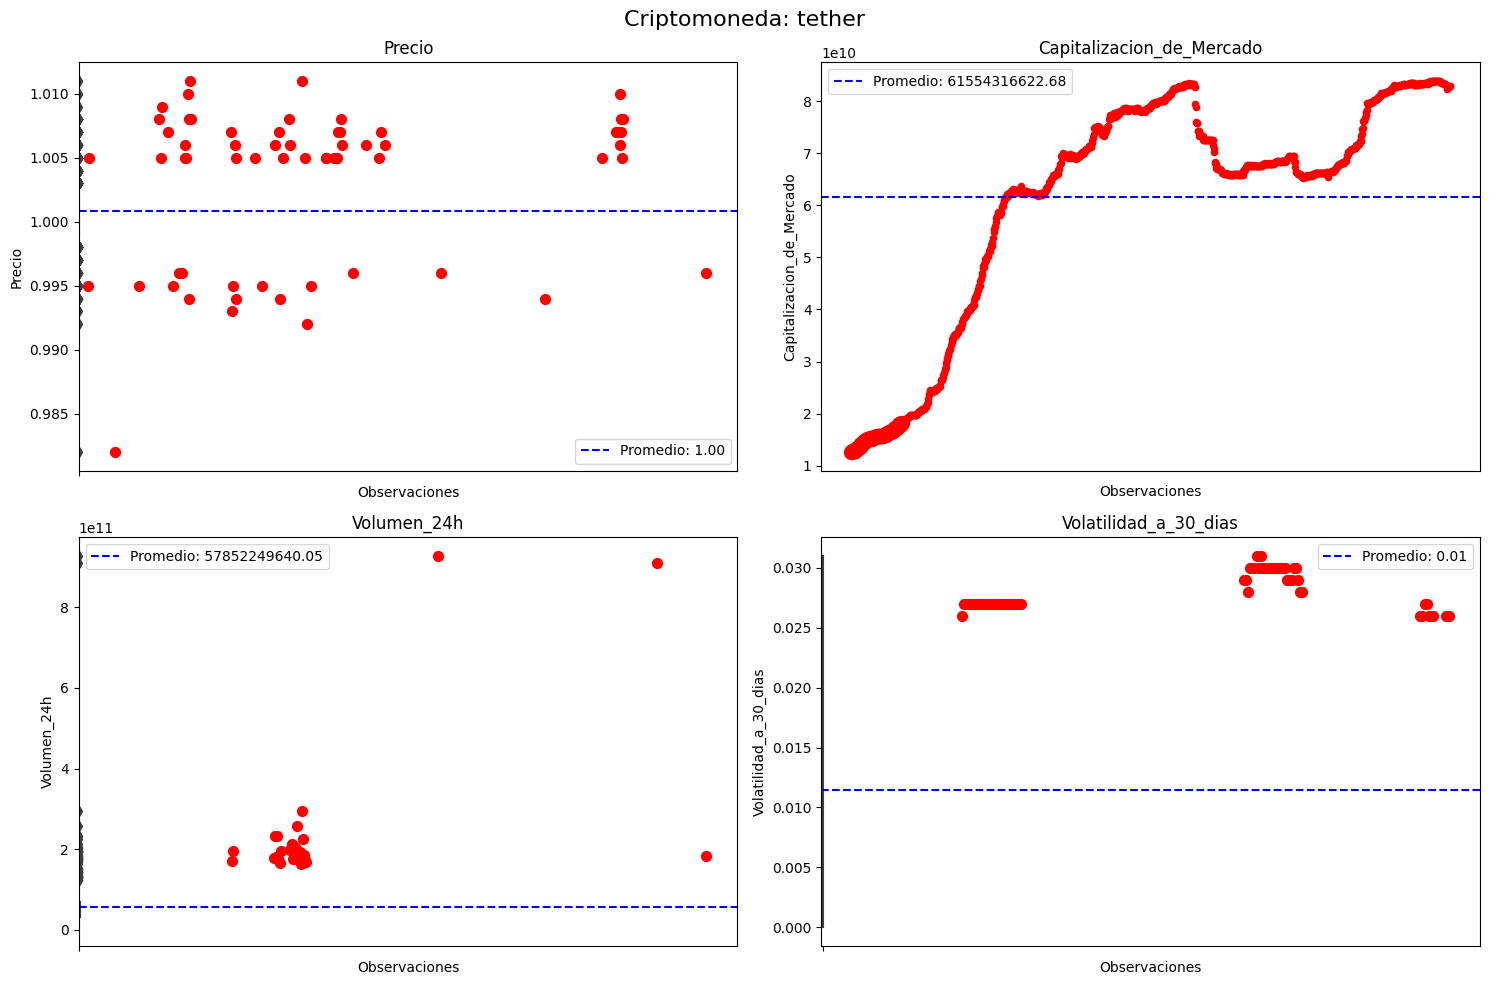

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Lista de columnas a analizar
columns_to_analyze = ['Precio','Capitalizacion_de_Mercado','Volumen_24h','Volatilidad_a_30_dias']

# Obtener todos los archivos CSV en el directorio actual
archivos_csv = [archivo for archivo in os.listdir() if archivo.endswith('.csv')]

for archivo in archivos_csv:
    df = pd.read_csv(archivo)
    
    # Convertir las columnas a numéricas y reemplazar valores no numéricos con 0
    for column in ['Volumen_24h', 'Capitalizacion_de_Mercado', 'Precio']:
        df[column] = pd.to_numeric(df[column], errors='coerce')
        df[column].fillna(0, inplace=True)
    
    """aqui haremos parte del ETL:

    Para columnas numéricas:

    count: número de valores no nulos.
    mean: media aritmética.
    std: desviación estándar.
    min: valor mínimo.
    25%: percentil 25.
    50%: mediana o percentil 50.
    75%: percentil 75.
    max: valor máximo.

    Para columnas no numéricas (por ejemplo, tipo object o categorial):

    count: número de valores no nulos.
    unique: número de valores únicos.
    top: valor más común.
    freq: frecuencia del valor más común."""

    print("-----------------------------")
    print(archivo)
    print("-----------------------------")
    print(df.info())
    print("-----------------------------")
    print(df.describe(include="all"))
    print("--------------------------------------------------------")
    
    plt.figure(figsize=(15, 10))
    
    for i, column in enumerate(columns_to_analyze, 1):
        z_scores = stats.zscore(df[column])
        abs_z_scores = np.abs(z_scores)
        outliers = df[(abs_z_scores > 2)]
        
        ax = plt.subplot(2, 2, i)  # Creando 4 subplots: 2 filas y 2 columnas
        
        # Si es Tether y la columna es 'Capitalizacion_de_Mercado', grafica solo los outliers
        if archivo == "tether.csv" and column == 'Capitalizacion_de_Mercado':
            plt.scatter(df.index, df[column], s=20, color='red')  # Grafica todos los puntos en gris
            plt.scatter(outliers.index, outliers[column], color='red', s=100)  # Grafica outliers en rojo con tamaño 100
            ax.set_xticks([])
            plt.xlabel("Observaciones", labelpad=10)
        else:
            sns.boxplot(y=df[column], ax=ax)
            plt.scatter(outliers.index, outliers[column], color='red', s=50)  # Marca outliers en rojo
        
        # Agregar una línea horizontal para el valor promedio
        avg_value = df[column].mean()
        ax.axhline(y=avg_value, color='blue', linestyle='--', label=f"Promedio: {avg_value:.2f}")
        
        # Establecer escala logarítmica si los datos varían en varios órdenes de magnitud
        if df[column].min() > 0 and df[column].max() / df[column].min() > 1000:
            ax.set_yscale("log")
            plt.title(f"{column} (Escala Logarítmica)")
        else:
            plt.title(column)
        
        plt.xlabel("Observaciones")
        plt.ylabel(column)
        plt.legend()  # Mostrar leyenda para el valor promedio
        
    # Mostrar información de la criptomoneda actual
    plt.suptitle(f"Criptomoneda: {archivo[:-4]}", fontsize=16)  # El archivo[:-4] es para quitar la extensión .csv
    plt.tight_layout()
    plt.show()


<strong>Conclusiones:

No hay datos faltantes o nulos
Noy hay datos duplicados
Los Outliers que se ven en cada grafico son valores
atípicos pero positivos, ya que o capitalizaron mas la criptomoneda en algun momento, eso significa que pudimos
vender en ciertos momento si hubiésemos invertido antes, pero ahora los valores estan dentro de los valores normales
en todas nuestras criptomonedas
La volatilidad tambien ahora esta en valores normales, pero cuando hubo mucha volatilidad fue por aumento del precio de la criptomoneda, no por valores depreciativos de la criptomoneda, y esto se repite en todas las criptomonedas elegidas

En la unica criptomoneda que vemos outliers menores a al promedio en el precio es en tether, pero son micromovimientos en el precio, ya que es una moneda que siempre vuelve a tender al valor del dolar, Tether (USDT) es una criptomoneda tipo "stablecoin" que afirma estar respaldada 1:1 con reservas de monedas fiduciarias, principalmente el dólar estadounidense. Eso significa que, en teoría, por cada Tether en circulación, debería haber un dólar estadounidense en reserva.

El propósito principal de las stablecoins como Tether es proporcionar estabilidad de precios en comparación con otras criptomonedas como Bitcoin y Ethereum, cuyos precios pueden ser altamente volátiles. Al estar "atado" al valor del dólar, Tether busca ofrecer lo mejor de ambos mundos: la flexibilidad y seguridad de una criptomoneda con la estabilidad relativa de una moneda fiduciaria.</strong>